Nhat Hoang Pham

MATH 5388: Machine Learning Method


Part 1: Regression

In [1]:
#Regression method
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
# Data , Prepprocessing
url = 'http://apmonitor.com/pds/uploads/Main/manufacturing.txt'
df = pd.read_csv(url)

# # 'material' (1 is abs, 0 is pla) with numpy.where
#df['material'] = np.where(data_1['material']=='abs',1,0)

# 'infill pattern' (1 is 'grid', 0 is 'honeycomb') with list comprehension
#data_1.infill_pattern = [1 if ip =="grid" else 0 for ip in data_1.infill_pattern]
#Dummies
# data_1["infill_pattern_grid"] = data_1.infill_pattern

# data_1["infill_pattern_honeycomb"] = 1- data_1.infill_pattern

# data_1["material_abs"] = data_1['material']
# data_1["material_pla"] = 1- data_1['material']

### Multivariate Analysis ###
# Find the columns with non-numeric data types
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse = False)

# Fit and transform the non-numeric columns
one_hot_encoded_columns = encoder.fit_transform(df[non_numeric_columns])

# Convert the result to a DataFrame and set the column names
encoded_df = pd.DataFrame(one_hot_encoded_columns, columns=encoder.get_feature_names_out(non_numeric_columns))

# Concatenate the original dataset and the encoded DataFrame
df = pd.concat([df.drop(non_numeric_columns, axis=1), encoded_df], axis=1)



# #Preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.drop(['tension_strength','elongation'], axis = 1)
y = df[['tension_strength']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 90)

# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

df.head()




,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strength,elongation,infill_pattern_grid,infill_pattern_honeycomb,material_abs,material_pla
0,0.02,8.0,90,220,60,40,0,25,18,1.2,1.0,0.0,1.0,0.0
1,0.02,7.0,90,225,65,40,25,32,16,1.4,0.0,1.0,1.0,0.0
2,0.02,1.0,80,230,70,40,50,40,8,0.8,1.0,0.0,1.0,0.0
3,0.02,4.0,70,240,75,40,75,68,10,0.5,0.0,1.0,1.0,0.0
4,0.02,6.0,90,250,80,40,100,92,5,0.7,1.0,0.0,1.0,0.0


       layer_height  wall_thickness  infill_density  nozzle_temperature  \
count     70.000000       70.000000       70.000000           70.000000   
mean       0.097286        5.464286       54.600000          221.785714   
std        0.061971        2.934455       27.926612           14.843037   
min        0.020000        1.000000       10.000000          200.000000   
25%        0.052500        3.000000       32.500000          210.000000   
50%        0.100000        5.500000       50.000000          220.000000   
75%        0.150000        8.000000       80.000000          230.000000   
max        0.200000       12.000000      100.000000          250.000000   

       bed_temperature  print_speed   fan_speed   roughness  \
count        70.000000    70.000000   70.000000   70.000000   
mean         73.214286    68.857143   48.614286  155.185714   
std          24.197792    45.501803   36.060454   96.070520   
min          60.000000    40.000000    0.000000   -1.000000   
25%      

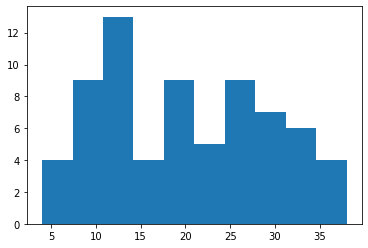

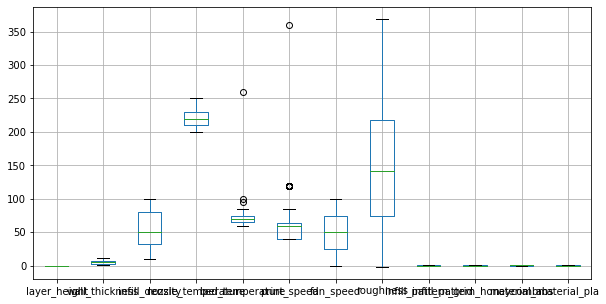

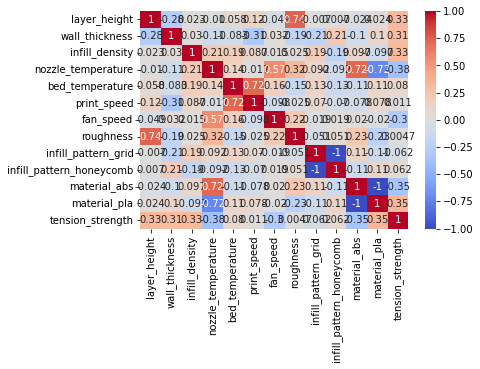

In [2]:
# EDA

print(X.describe())
print(y.describe())

plt.hist(y, bins=10)
plt.show()
X.boxplot(figsize = (10,5))
plt.show()

corr_matrix = pd.concat([X, y], axis=1).corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()



In [3]:

outlier = df[(df['print_speed'] > 300) | (df['bed_temperature'] > 250)]
print(outlier.index)

Int64Index([63], dtype='int64')


(56, 12)
(56, 1)
Linear Regression MSE test data:  5.657877925347136
Coefficients:  [[ 9.50643904e+01  1.27368453e+00  1.11034800e-01  6.67020356e-03
  -1.31977550e-03 -4.00370198e-03 -5.69712792e-02 -2.87267926e-02
  -2.85399631e-01  2.85399631e-01 -2.30265236e+00  2.30265236e+00]]
Rsquared:  0.9055816029486558


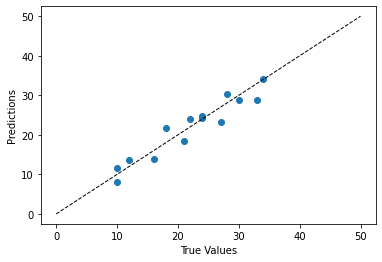

In [4]:
# Regression 
# Parametric Method: Linear Regression
from sklearn.linear_model import LinearRegression


reg = LinearRegression()

print(X_train.shape)
print(y_train.shape)

reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
mse_reg = mean_squared_error(y_test,y_pred)

r_2 = r2_score(y_test,y_pred)

print("Linear Regression MSE test data: ", mse_reg)
print("Coefficients: ", reg.coef_)
print("Rsquared: ",r_2 )
# Plot the predicted values against the actual values
plt.scatter(y_test,y_pred)
plt.plot([0,50], [0,50], 'k--', lw=1)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()





In [5]:
# Regression 
#Non Parametric Method: Decision Tree
from sklearn.ensemble import RandomForestRegressor

## Create the model and fit it to the training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)

y_train_rf = y_train.values.ravel()

rf.fit(X_train, y_train_rf)

# Use the model to make predictions on the test data
y_pred_rf = rf.predict(X_test)

# Calculate the mean squared error of the predictions
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Regressor MSE: ", mse_rf)
r_2_rf = r2_score(y_test,y_pred_rf)


print("Random Forest R squared : ", r_2_rf)

Random Forest Regressor MSE:  12.847114285714285
Random Forest R squared :  0.7856079693486591


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


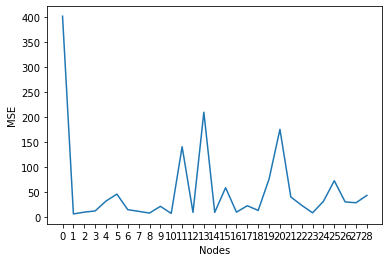

In [6]:
from sklearn.neural_network import MLPRegressor
hidden_layers = [i for i in range(0,20)]
mse_array = []
y_train_mlp = y_train.values.ravel()


# Create a MLP object with 2 hidden layers each with 10 neurons
for h in range(1,30):
    mlp = MLPRegressor(hidden_layer_sizes=(h,),max_iter=10000, random_state=42)
    # Fit the model using the training data
    mlp.fit(X_train, y_train_mlp)
    # Predict the tension strength for the test data
    y_pred_mlp = mlp.predict(X_test)
    # Evaluate the model using the mean squared error
    mse_mlp = mean_squared_error(y_pred_mlp, y_pred)
    mse_array.append(mse_mlp)
    
plt.plot(mse_array,)
plt.xticks(range(len(mse_array)))

plt.xlabel("Nodes")
plt.ylabel("MSE")
plt.show()


In [7]:
# I chose 1 hidden layers


mlp = MLPRegressor(hidden_layer_sizes=(7),max_iter=10000, random_state=42)
# Fit the model using the training data
mlp.fit(X_train, y_train_mlp)
# Predict the tension strength for the test data
y_pred_mlp = mlp.predict(X_test)
# Evaluate the model using the mean squared error
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print("MSE with 7 hidden layers",mse_mlp)
r_2_mlp = r2_score(y_test,y_pred_mlp)
print("R-squared with 7 hidden layers",r_2_mlp)

MSE with 7 hidden layers 15.217776691763044
R-squared with 7 hidden layers 0.7460464681493779


<AxesSubplot:>

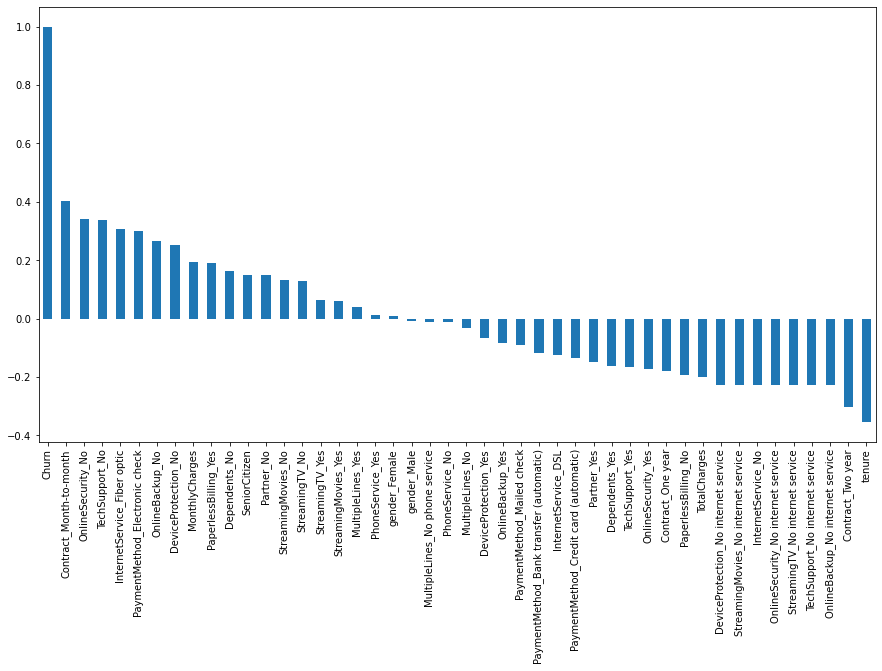

In [8]:
#Classification
df2 = pd.read_csv('part2.csv')
df2.head()
#Deal with missing data
# Converting Total Charges to a numerical data type.
df2.TotalCharges = pd.to_numeric(df2.TotalCharges, errors='coerce')
df2.isnull().sum()
#Removing missing values 
df2.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df2.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')





In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_2 = df_dummies["Churn"]
X_2 = df_dummies.drop("Churn", axis  = 1 )

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2, test_size = 0.2,random_state = 42,shuffle = True)
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)
y_train_1d_2 = y_train_2.values.ravel()

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

AUC:  0.8319079986126282


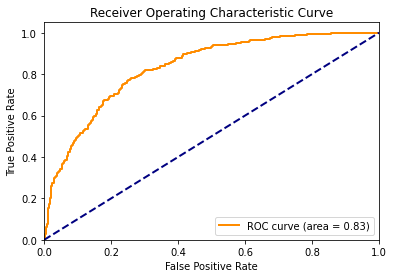

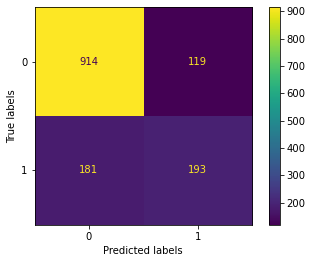

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve,auc, ConfusionMatrixDisplay, classification_report



#Classification
# Parametric: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Fit a logistic regression model to the training data

lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train_2, y_train_1d_2)

# Use the model to make predictions on the testing data
y_pred_lr = lr.predict(X_test_2)

print(classification_report(y_test_2,y_pred_lr))
# ROC_AUC
fpr, tpr, thresholds = roc_curve(y_test_2,lr.predict_proba(X_test_2)[:,1])
roc_auc = auc(fpr, tpr)
print("AUC: ", roc_auc)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test_2,y_pred_lr)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1033
           1       0.52      0.52      0.52       374

    accuracy                           0.75      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.75      0.75      1407

AUC:  0.768052658007672


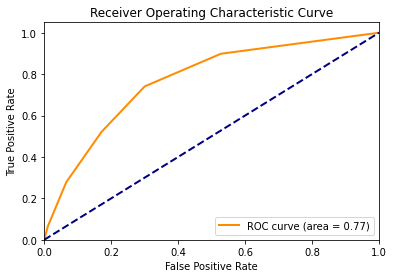

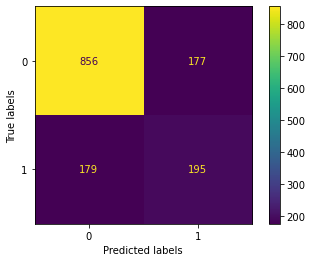

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Fit a KNN model to the training data
clf_2 = KNeighborsClassifier(n_neighbors=5)
clf_2.fit(X_train_2, y_train_1d_2)

# Use the model to make predictions on the testing data
y_pred_knn = clf_2.predict(X_test_2)

# Calculate the accuracy of the model on the testing data
print(classification_report(y_test_2,y_pred_knn))
# ROC_AUC
fpr, tpr, thresholds = roc_curve(y_test_2,clf_2.predict_proba(X_test_2)[:,1])
roc_auc = auc(fpr, tpr)
print("AUC: ", roc_auc)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test_2,y_pred_knn)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

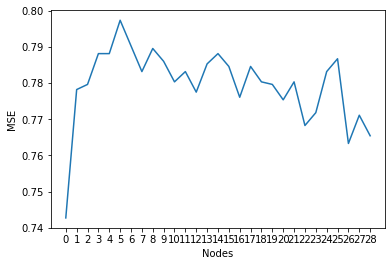

In [16]:
import numpy as np
from sklearn.neural_network import MLPClassifier
accuracy_array= []
# Create a MLP object with 2 hidden layers each with 10 neurons
for h in range(1,30):
    mlp = MLPClassifier(hidden_layer_sizes=(h,),max_iter=1000, random_state=42)
    # Fit the model using the training data
    mlp.fit(X_train_2, y_train_1d_2)
    # Predict the tension strength for the test data
    y_pred_mlc = mlp.predict(X_test_2)
    # Evaluate the model using the mean squared error
    accuracy = accuracy_score(y_test_2, y_pred_mlc)
    accuracy_array.append(accuracy)
    
plt.plot(accuracy_array)
plt.xticks(range(len(accuracy_array)))
plt.xlabel("Nodes")
plt.ylabel("MSE")
plt.show()






              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

AUC:  0.8205838350477039


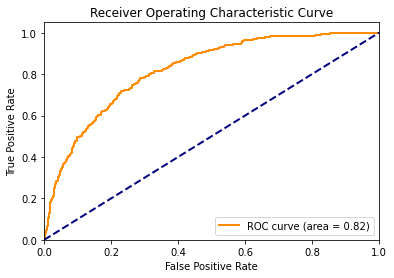

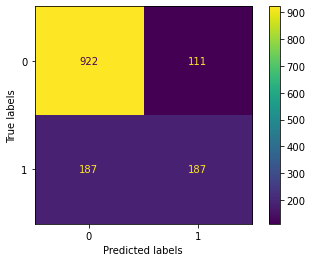

In [15]:
# I chose the size of hidden layer is 5

# Create an M model and fit it to the training data
mlc = MLPClassifier(hidden_layer_sizes=(5), activation='relu', solver='adam', max_iter=1000)
mlc.fit(X_train_2, y_train_1d_2)


# Use the model to make predictions on the test data
y_pred_mlc= mlc.predict(X_test_2)

# Calculate the accuracy of the model on the testing data
print(classification_report(y_test_2,y_pred_mlc))
# ROC_AUC
fpr, tpr, thresholds = roc_curve(y_test_2,mlc.predict_proba(X_test_2)[:,1])
roc_auc = auc(fpr, tpr)
print("AUC: ", roc_auc)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test_2,y_pred_mlc)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()